# Final Project - Rachel Holman

# Metadata

```yaml
Course:  DS 5100
Module:  00 Final Project
Topic:   Monte Carlo Dice Game
```

# Student Info

* Name: Rachel Holman
* Net UD: dnw9qk
* URL of this file in GitHub: https://github.com/rachel-holman/dnw9qk_ds5100_montecarlo/blob/main/montecarlo_demo.ipynb

In [1]:
import numpy as np
import pandas as pd
import montecarlo.montecarlo as m
import matplotlib.pyplot as plt
import seaborn as sns

# Scenario 1: A 2-Headed Coin
1. Create a fair coin (with faces H and T) and one unfair coin in which one of the faces has a weight of 5 and the others 1.

2. Play a game of 1000 flips with two fair dice.

3. Play another game (using a new Game object) of 1000 flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

4. For each game, use an Analyzer object to determine the relative frequency of jackpots — i.e. getting either all Hs or all Ts.

5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

6. Show your results, comparing the two relative frequencies, in a simple bar chart.

In [2]:
faircoin = m.Die(np.array(['H','T']))
unfaircoin = m.Die(np.array(['H','T']))
unfaircoin.change_side_weight('H', 5)

In [3]:
faircoin.current_state()

,weight
face,
H,1.0
T,1.0


In [4]:
unfaircoin.current_state()

,weight
face,
H,5.0
T,1.0


In [5]:
fairgame = m.Game([faircoin, faircoin])
fairgame.play(1000)

In [6]:
unfairgame = m.Game([unfaircoin, unfaircoin, faircoin])
unfairgame.play(1000)

In [7]:
fairgame.show_results()

,1,2
roll,,
1,T,H
2,H,H
3,T,T
4,T,T
5,T,H
...,...,...
996,H,H
997,H,T
998,H,H


In [8]:
unfairgame.show_results()

,1,2,3
roll,,,
1,T,H,T
2,H,H,H
3,H,H,T
4,H,H,T
5,H,H,T
...,...,...,...
996,T,T,H
997,H,T,H
998,T,H,T


In [9]:
fairanalysis = m.Analyzer(fairgame)
unfairanalysis = m.Analyzer(unfairgame)

In [10]:
rel_fairjackpots = fairanalysis.jackpot()/1000
rel_unfairjackpots = unfairanalysis.jackpot()/1000

Text(0.5, 1.0, 'Fair Game Uses Fair Coins, Unfair Game Uses Unfair Coins')

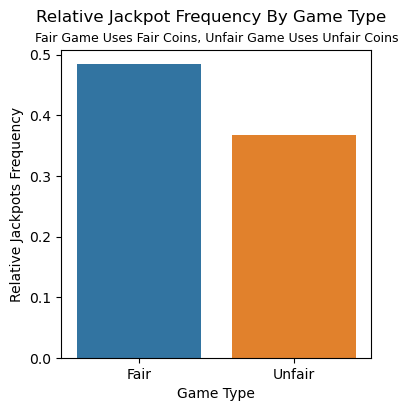

In [11]:
cointype= ['Fair', 'Unfair']
Jackpots= [rel_fairjackpots, rel_unfairjackpots]

plt.figure(figsize=(4, 4))
sns.barplot(x=cointype, y=Jackpots)
plt.ylabel('Relative Jackpots Frequency')
plt.xlabel('Game Type')
plt.suptitle('Relative Jackpot Frequency By Game Type')
plt.title('Fair Game Uses Fair Coins, Unfair Game Uses Unfair Coins', fontsize=9)

# Scenario 2: A 6-Sided Die

1. Create three dice, each with six sides having the faces 1 through 6.

2. Convert one die to an unfair one by weighting the face 6 five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

3. Convert another die to be unfair by weighting the face 1 five times more than the others.

4. Play a game of 10000 rolls with 5 fair dice.

5. Play a game of 10000 rolls with 2 unfair dice, one as defined in steps #2 and #3 respectively, and 3 fair dice.

6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

7. Also compute 10 most frequent combinations of faces for each game.

8. Plot each of these combination results as bar charts.

In [12]:
fairdie = m.Die()
unfair6 = m.Die()
unfair1 = m.Die()

In [13]:
unfair6.change_side_weight(6, 5)
unfair1.change_side_weight(1, 5)

In [14]:
fairdie.current_state()

,weight
face,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [15]:
unfair6.current_state()

,weight
face,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


In [16]:
unfair1.current_state()

,weight
face,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


In [17]:
fairgame = m.Game([fairdie, fairdie, fairdie, fairdie, fairdie])
fairgame.play(10000)
fairgame.show_results()

,1,2,3,4,5
roll,,,,,
1,6,1,6,2,6
2,5,3,6,4,6
3,3,2,3,6,6
4,6,1,6,1,1
5,5,5,1,2,1
...,...,...,...,...,...
9996,3,6,5,5,1
9997,6,1,3,1,4
9998,3,6,5,5,6


In [18]:
unfairgame = m.Game([unfair6, unfair1, fairdie, fairdie, fairdie])
unfairgame.play(10000)
unfairgame.show_results()

,1,2,3,4,5
roll,,,,,
1,5,6,2,2,2
2,1,6,6,4,2
3,3,1,6,6,3
4,2,1,2,1,6
5,6,1,3,4,6
...,...,...,...,...,...
9996,2,1,4,6,2
9997,6,3,1,5,5
9998,6,1,5,3,6


In [19]:
fairanalysis = m.Analyzer(fairgame)
unfairanalysis = m.Analyzer(unfairgame)

In [20]:
rel_fairjackpots = fairanalysis.jackpot()/10000
rel_unfairjackpots = unfairanalysis.jackpot()/10000

In [21]:
rel_fairjackpots

0.0011

Text(0.5, 1.0, 'Fair Game Uses Fair Dice, Unfair Game Uses Unfair Dice')

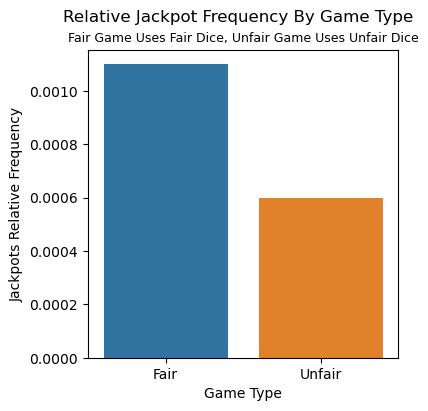

In [22]:
dietype= ['Fair', 'Unfair']
Jackpots= [rel_fairjackpots, rel_unfairjackpots]

plt.figure(figsize=(4, 4))
sns.barplot(x=dietype, y=Jackpots)
plt.ylabel('Jackpots Relative Frequency')
plt.xlabel('Game Type')
plt.suptitle('Relative Jackpot Frequency By Game Type')
plt.title('Fair Game Uses Fair Dice, Unfair Game Uses Unfair Dice', fontsize=9)

In [23]:
faircombo = fairanalysis.combo_count().head(10)
faircombo

count
1 2 3 4 5       
1 1 1 1 1      1
        2     10
        3      2
        4      9
        5      6
        6      3
      2 2      9
        3     33
        4     26
        5     28

In [24]:
unfaircombo =unfairanalysis.combo_count().head(10)
unfaircombo

count
1 2 3 4 5       
1 1 1 1 1      2
        2      6
        3     11
        4     12
        5     11
        6     19
      2 2      9
        3     38
        4     33
        5     43

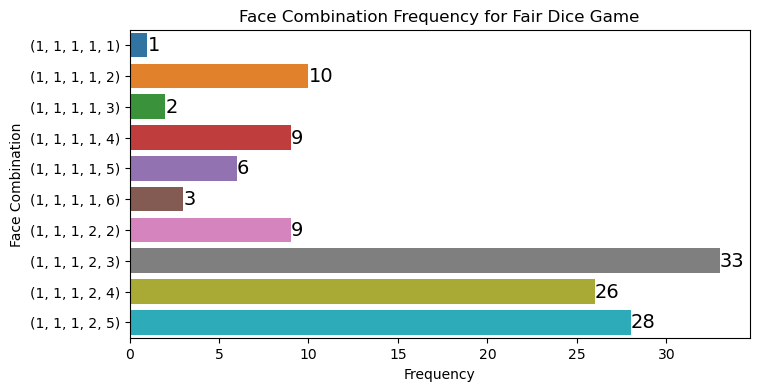

In [25]:
plt.figure(figsize=(8, 4))
myplot = sns.barplot(y=faircombo.index.values, x=faircombo['count'])
plt.xlabel('Frequency')
plt.ylabel('Face Combination')
plt.title('Face Combination Frequency for Fair Dice Game')
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

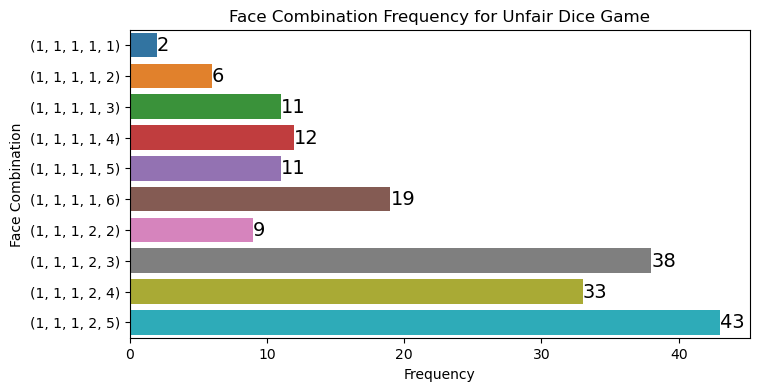

In [26]:
plt.figure(figsize=(8, 4))
myplot = sns.barplot(y=unfaircombo.index.values, x=unfaircombo['count'])
plt.xlabel('Frequency')
plt.ylabel('Face Combination')
plt.title('Face Combination Frequency for Unfair Dice Game')
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

# Scenario 3: Letters of the Alphabet

1. Create a “die” of letters from A to Z with weights based on their frequency of usage as found in the data file english_letters.txt. Use the frequencies (i.e. raw counts) as weights.

2. Play a game involving 4 of these dice with 1000 rolls.

3. Determine how many distinct permutations in your results are actual English words, based on the vocabulary found in scrabble_words.txt.

4. Repeat steps #2 and #3 using 5 dice and compare the results. Which word length generates a higher percentage of English words?

In [27]:
letters = pd.read_csv('english_letters.txt', header=None, sep=' ')\
            .rename({0:'letter', 1:'freq'}, axis=1)
letters

,letter,freq
0,E,529117365
1,T,390965105
2,A,374061888
3,O,326627740
4,I,320410057
5,N,313720540
6,S,294300210
7,R,277000841
8,H,216768975
9,L,183996130


In [28]:
alphabet = m.Die(np.array(letters['letter']))
alphabet.current_state()

,weight
face,
E,1.0
T,1.0
A,1.0
O,1.0
I,1.0
N,1.0
S,1.0
R,1.0
H,1.0


In [29]:
for n in range(len(letters)):
    alphabet.change_side_weight(letters.letter[n], letters.freq[n].item())

alphabet.current_state()

,weight
face,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


In [30]:
wordgame4 = m.Game([alphabet,alphabet,alphabet,alphabet])
wordgame4.play(1000)
wordgame4.show_results()

,1,2,3,4
roll,,,,
1,S,R,T,N
2,E,T,E,Y
3,H,L,L,O
4,F,A,N,D
5,F,D,B,A
...,...,...,...,...
996,I,A,Y,N
997,P,G,C,Y
998,N,L,I,O


In [31]:
wordanalysis = m.Analyzer(wordgame4)
fourletterwords = wordanalysis.permutation_count()
fourletterwords = fourletterwords.index.map(''.join).to_frame().rename({0:'perm'}, axis=1)
fourletterwords

,perm
AAAA,AAAA
AAAN,AAAN
AAEA,AAEA
AAET,AAET
AAIP,AAIP
...,...
YSAW,YSAW
YSEE,YSEE
YTBE,YTBE
YTES,YTES


In [32]:
scrabble = pd.read_csv('scrabble_words.txt', header=None)\
            .rename({0:'word'}, axis=1)
scrabble

,word
0,AA
1,AAH
2,AAHED
3,AAHING
4,AAHS
...,...
279491,ZYTHUMS
279492,ZYZZYVA
279493,ZYZZYVAS
279494,ZZZ


In [33]:
words4l = fourletterwords.perm.isin(scrabble.word).astype(int).sum()
words4l 

57

In [34]:
wordgame5 = m.Game([alphabet,alphabet,alphabet,alphabet,alphabet])
wordgame5.play(1000)
wordgame5.show_results()

,1,2,3,4,5
roll,,,,,
1,E,I,D,E,T
2,A,T,N,L,D
3,O,T,T,C,I
4,D,W,N,E,O
5,A,H,G,Y,L
...,...,...,...,...,...
996,R,H,C,R,N
997,T,B,O,T,Y
998,E,R,R,N,V


In [35]:
wordanalysis = m.Analyzer(wordgame5)
fiveletterwords = wordanalysis.permutation_count()
fiveletterwords = fiveletterwords.index.map(''.join).to_frame().rename({0:'perm'}, axis=1)
fiveletterwords

,perm
AAAVG,AAAVG
AABHD,AABHD
AADEW,AADEW
AADHO,AADHO
AAEIA,AAEIA
...,...
YROLW,YROLW
YTIRN,YTIRN
YWHTD,YWHTD
YWOOG,YWOOG


In [36]:
words5l = fiveletterwords.perm.isin(scrabble.word).astype(int).sum()
words5l

9

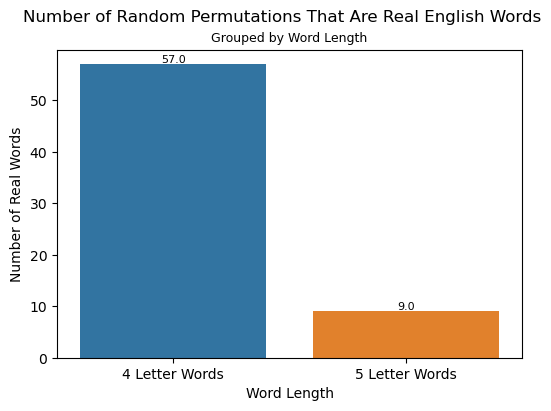

In [37]:
wordtype= ['4 Letter Words', '5 Letter Words']
count= [words4l, words5l]

plt.figure(figsize=(6, 4))
myplot= sns.barplot(x=wordtype, y=count)
plt.ylabel('Number of Real Words')
plt.xlabel('Word Length')
plt.suptitle('Number of Random Permutations That Are Real English Words')
plt.title('Grouped by Word Length', fontsize=9)
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(ycoor), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=8)

Four letter word length generates a higher percentage of English Words than five letter word length.